# BOOM: Tephrochronology dataset of the Southern and Austral volcanic zones of the Andes.

### Machine Learning analysis

In [2]:
import pandas as pd

#load the data
BOOM_geodf = pd.read_csv("../Data/BOOMDataset.csv", encoding = 'latin1', low_memory =False )

In [4]:
BOOM_geodf.describe()

Magnitude          Vei      Latitude     Longitude       14C_Age  \
count  5533.000000  3984.000000  16738.000000  16738.000000    384.000000   
mean      4.645527     4.596135    -41.558985    -72.107202   5729.721354   
std       0.938234     0.700271      3.214217      0.849289   4185.434745   
min       2.000000     2.000000    -53.750000    -75.680000     90.000000   
25%       4.000000     4.000000    -42.890833    -72.419000   2078.750000   
50%       5.000000     5.000000    -40.368284    -71.972250   4450.000000   
75%       5.300000     5.000000    -39.546000    -71.630000   9322.500000   
max       6.200000     6.000000    -38.438690    -68.700000  14840.000000   

       14C_Age_Error  40Ar39Ar_Age  40Ar39Ar_Age_Error          SiO2  \
count     384.000000     10.000000            10.00000  13791.000000   
mean       62.677083  10441.800000          1850.20000     63.719141   
std        47.337022   5742.516402          1136.15353      7.320255   
min        19.000000     18.000000             2.00000     45.972845   
25%        36.000000   6525.000000          1100.00000     56.663051   
50%        50.000000  11750.000000          1750.00000     64.530000   
75%        75.000000  14250.000000          2700.00000     69.697550   
max       400.000000  18700.000000          3800.00000     79.762073   

               TiO2  ...  Fe2O3T_normalized  FeOT_normalized  MnO_normalized  \
count  13791.000000  ...         620.000000     12233.000000    12497.000000   
mean       0.967836  ...           8.403211         5.910409        0.156548   
std        0.572116  ...           2.323430         3.347711        0.158753   
min        0.000000  ...           1.399078         0.274613       -0.041335   
25%        0.500900  ...           6.823851         3.350335        0.104559   
50%        0.946975  ...           8.839089         4.884043        0.151574   
75%        1.360750  ...          10.109943         9.188012        0.193294   
max        6.280000  ...          15.440233        15.311673        4.471731   

       MgO_normalized  CaO_normalized  Na2O_normalized  K2O_normalized  \
count    13025.000000    13025.000000     13025.000000    13025.000000   
mean         1.949918        4.378921         4.494148        2.055788   
std          1.737541        2.708942         0.872777        0.951714   
min          0.000000        0.345768         0.983520        0.008971   
25%          0.525689        1.998904         3.804828        1.191817   
50%          1.250123        3.514872         4.561725        1.894722   
75%          3.230767        6.883497         5.151625        2.917573   
max         16.174723       12.001885         7.781000        5.880588   

       P2O5_normalized  Cl_normalized  Total_normalization  
count     10351.000000    4646.000000         13025.000000  
mean          0.227642       0.147719            98.749406  
std           0.135126       0.061761             1.606102  
min           0.000000       0.001000            89.403912  
25%           0.122664       0.097194            97.881800  
50%           0.223274       0.143800            98.975100  
75%           0.313450       0.191679            99.817868  
max           1.563130       0.610061           103.070000  

[8 rows x 61 columns]

 Prepare dataset

In [5]:
import numpy as np

# 0. Drop volcanoes wiht less than 10 sample observations
BOOM_geodf = BOOM_geodf[(BOOM_geodf.Volcano!='Yanteles')&(BOOM_geodf.Volcano!='Cordón Cabrera')&(BOOM_geodf.Volcano!='Corcovado')&(BOOM_geodf.Volcano!='Cay')]

# 1. Filter data
# 1.1 Dropping rows corresponding to samples not analyzed for geochemistry, as well as outliers and samples for the volcanic
#     is uncertain
BOOM_geodf = BOOM_geodf[(BOOM_geodf['TypeOfRegister'].isin(['Pyroclastic material','Effusive material']))]
BOOM_geodf.Flag = BOOM_geodf.Flag.astype(str)
BOOM_geodf = BOOM_geodf[(BOOM_geodf.Flag.str.contains('Outlier') == False)
                        &(BOOM_geodf.Flag.str.contains('VolcanicSource_Issue') == False)]

# 1.2 Replace element concentrations registered as "0" with below detection limit (bdl). Because a value equal to cero is
#     not possible to determine with the current analytical techniques
for elemento in ["SiO2","TiO2","Al2O3","FeO","Fe2O3",
                 "MnO","MgO","CaO","Na2O","K2O","P2O5",
                 "Cl",'Rb','Sr','Y','Zr','Nb',
                 'Cs','Ba','La','Ce','Pr','Nd',
                 'Sm','Eu','Gd','Tb','Dy','Ho',
                 'Er','Tm','Yb','Lu','Hf','Ta',
                 'Pb','Th','U']:
    BOOM_geodf[elemento] = BOOM_geodf[elemento].replace(to_replace=0, value='bdl')
    
# 1.3 Drop rows where data is Missing Not At Random (increases the performance)
for columna in BOOM_geodf.columns:
    BOOM_geodf=BOOM_geodf[(BOOM_geodf[columna]!= 'Over range')&
                            (BOOM_geodf[columna]!= 'bdl')&
                            (BOOM_geodf[columna]!= '<0.1')&
                            (BOOM_geodf[columna]!= '<1')&
                            (BOOM_geodf[columna]!= '<5')&
                            (BOOM_geodf[columna]!= '<6')&
                            (BOOM_geodf[columna]!= '<10')]
    
# 1.5 Replace data Missing At Random with nan or value
BOOM_geodf = BOOM_geodf.replace(to_replace='n.a.', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='Not analyzed', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='-', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='Not determined', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='n.d', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='n.d.', value=np.nan)
BOOM_geodf = BOOM_geodf.replace(to_replace='<0.01', value=0.01)

# 1.4 Drop rows where MnO was not analyzed, as it is Missing Not At Random
BOOM_geodf = BOOM_geodf.replace(np.nan,-1)
BOOM_geodf = BOOM_geodf[((BOOM_geodf['SiO2_normalized']!=-1)&(BOOM_geodf['MnO_normalized']!=-1))|(BOOM_geodf['SiO2_normalized']==-1)]
BOOM_geodf = BOOM_geodf.replace(-1, np.nan)

BOOM_geodf = BOOM_geodf.reset_index(drop=True)

# 1.5 calculate FeOT for all samples 
BOOM_geodf = BOOM_geodf.replace(np.nan, -1)
for i in range(0,len(BOOM_geodf.Volcano)):
    if (BOOM_geodf.loc[i,'SiO2_normalized'] !=-1)&((BOOM_geodf.FeOT_normalized[i] == -1)&((BOOM_geodf.FeO_normalized[i]!=-1)&(BOOM_geodf.Fe2O3_normalized[i]!=-1))):
        BOOM_geodf.loc[i,'FeOT_normalized'] = BOOM_geodf.FeO_normalized[i]+BOOM_geodf.Fe2O3_normalized[i]*0.899
            
    if (BOOM_geodf.loc[i,'SiO2_normalized'] !=-1)&((BOOM_geodf.FeOT_normalized[i] == -1)&(BOOM_geodf.Fe2O3T_normalized[i]!=-1)):
        BOOM_geodf.loc[i,'FeOT_normalized'] = BOOM_geodf.Fe2O3T_normalized[i]*0.899        

BOOM_geodf = BOOM_geodf.replace(-1,np.nan)

# 2. Define target attributes (volcano and events) and list of SampleIDs to consider in the split train/test sets
BOOM_geodf['Volcano'] = BOOM_geodf['Volcano'].astype("category")
BOOM_geodf['Event'] = BOOM_geodf['Event'].astype("category")
BOOM_geodf['SampleID'] = BOOM_geodf['SampleID'].astype("category")

BOOM_geodf['SampleID'].cat.categories
BOOM_geodf['Volcano'].cat.categories
BOOM_geodf['Event'].cat.categories

# 3. Filter samples for which volcano id is unknown, define sets for machine learning
df_unknown_volcano = BOOM_geodf[(BOOM_geodf['Volcano'] == 'Unknown')]
df_unknown_event = BOOM_geodf[(BOOM_geodf['Event'] == 'Unknown')]
df_volcanoes = BOOM_geodf[(BOOM_geodf['Volcano'] != 'Unknown')].copy()
df_volcanoes_major = BOOM_geodf[(BOOM_geodf['Volcano'] != 'Unknown')].copy()
df_volcanoes_major = df_volcanoes_major.dropna(axis = 'rows',subset=(['SiO2']))
df_events = BOOM_geodf[(BOOM_geodf['Volcano'] != 'Unknown') & (BOOM_geodf['Event'] != 'Unknown')].copy()

# 4. Retrieve the geochemical data, FeO, Fe2O3 and FeO2O3T are dropped because FeOT is a differnt expression of the same element
#    P2O5 and Cl are sporadically analyzed    

majors = ['SiO2_normalized', 'TiO2_normalized', 'Al2O3_normalized',
           'FeOT_normalized', #'FeO_normalized', 'Fe2O3_normalized', 'Fe2O3T_normalized',
          'MnO_normalized','MgO_normalized', 'CaO_normalized', 'Na2O_normalized', 'K2O_normalized',
          #'P2O5_normalized','Cl_normalized'
         ] 

X_major_volcanoes = df_volcanoes.loc[:, majors]
X_onlymajor_volcanoes = df_volcanoes_major.loc[:, majors]
X_major_events = df_events.loc[:, majors] 

traces = ['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La',
          'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
          'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb',
          'Th', 'U']

X_traces_volcanoes = df_volcanoes.loc[:, traces]
X_traces_events = df_events.loc[:, traces] 

X_volcanoes = pd.concat([X_major_volcanoes, X_traces_volcanoes], axis=1)
X_events = pd.concat([X_major_events, X_traces_events], axis=1)

# The list of volcanoes and events and associated codes
yv = np.array(df_volcanoes['Volcano'].cat.codes, dtype='int8')
SampleID_volcanoes = np.array(df_volcanoes['SampleID'].cat.codes)

yv_major= np.array(df_volcanoes_major['Volcano'].cat.codes, dtype='int8')
SampleID_volcanoes_major = np.array(df_volcanoes_major['SampleID'].cat.codes)

ye = np.array(df_events['Event'].cat.codes, dtype='int8')
SampleID_events = np.array(df_events['SampleID'].cat.codes)

### 3.1 Learn a model, with stratified Kfold cross val
*The chosen metric is the fraction of correctly classified samples*.

id: 0, volcán: Aguilera, sample observations: 42
id: 1, volcán: Antillanca-Casablanca, sample observations: 223
id: 2, volcán: Apagado, sample observations: 44
id: 3, volcán: Caburga-Huelemolle, sample observations: 134
id: 4, volcán: Calbuco, sample observations: 158
id: 5, volcán: Carrán-Los Venados, sample observations: 95
id: 6, volcán: Chaitén, sample observations: 2280
id: 7, volcán: Hornopirén, sample observations: 26
id: 8, volcán: Huanquihue Group, sample observations: 176
id: 9, volcán: Hudson, sample observations: 560
id: 10, volcán: Huequi, sample observations: 11
id: 11, volcán: Lanín, sample observations: 75
id: 12, volcán: Lautaro, sample observations: 38
id: 13, volcán: Llaima, sample observations: 1393
id: 14, volcán: Macá, sample observations: 12
id: 15, volcán: Melimoyu, sample observations: 456
id: 16, volcán: Mentolat, sample observations: 119
id: 17, volcán: Michinmahuida, sample observations: 571
id: 18, volcán: Mocho-Choshuenco, sample observations: 2659
id: 19,

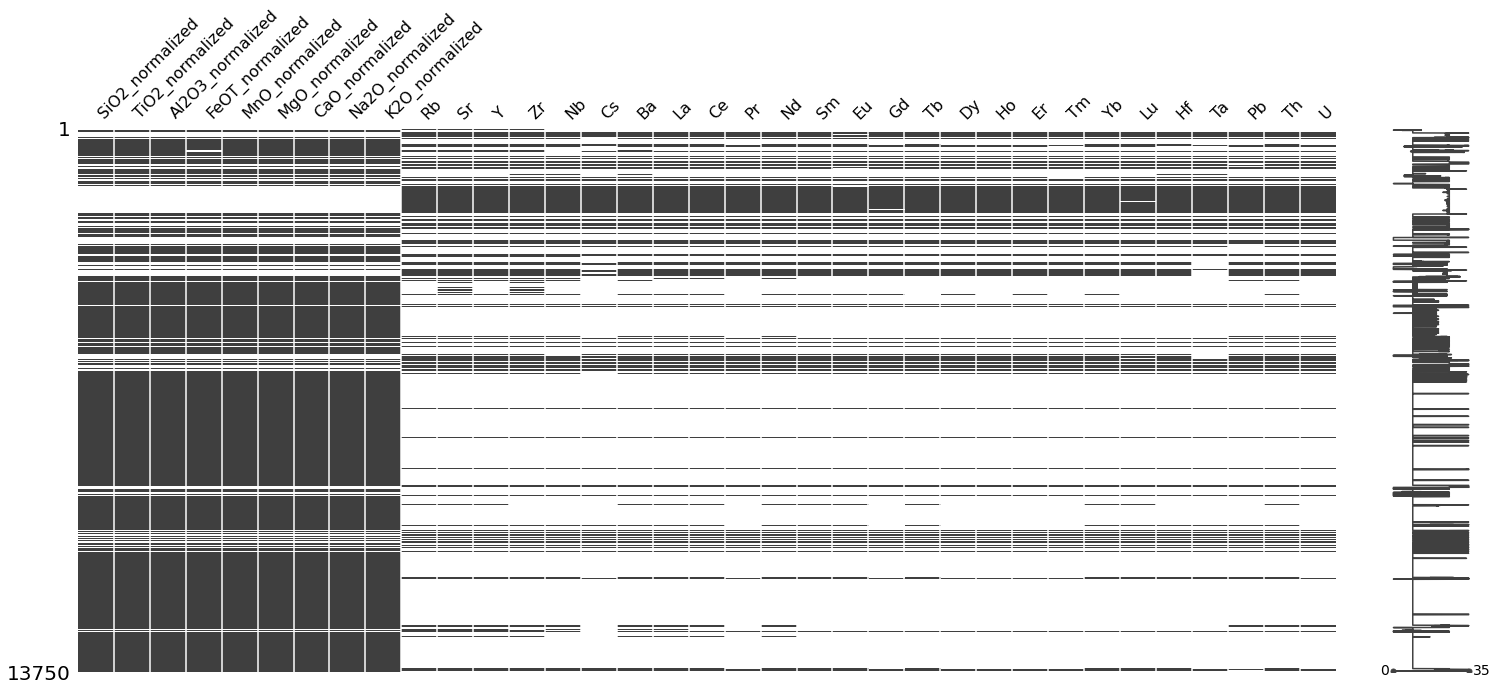

In [7]:
# Understanding data
# Print number of sample observations per class
unique, counts = np.unique(yv, return_counts=True)
for u, c in zip(unique, counts):
    print('id: {}, volcán: \033[1m{}\033[0m, sample observations: {}'.format(u,df_volcanoes['Volcano'].cat.categories[u],c))

n_classes = len(unique)

import missingno as msno
msno.matrix(X_volcanoes)

#Visualizing data
import plotly.express as px
import sys
sys.path.insert(1, '../Scripts')
from functions import colores
#df_volcanoes_lowSampleCount = df_volcanoes.dropna(axis = 'rows',subset=(['properties.SiO2']))[df_volcanoes['properties.Volcano'].isin(
#    ['Apagado','Cay','Corcovado','Cordón Cabrera','Huequi','Macá','Mentolat','Yanteles'])]
fig = px.scatter(df_volcanoes, 'SiO2_normalized', 'K2O_normalized' ,
                 color ='Volcano',# symbol = 'properties.SampleID',
                 color_discrete_map = colores(df_volcanoes['Volcano'],type="volcano"),
                 hover_data = ['SampleID','SampleObservationID',
                               'Volcano','Event','Authors',
                               'Flag'],width=800, height=500)
fig.show()

In [8]:
# The model to be trained
from sklearn.neighbors import KNeighborsClassifier

# K nearest neighbours
est = KNeighborsClassifier(n_neighbors=2,weights='distance')
grid = {'kneighborsclassifier__n_neighbors': [2, 5, 10],
        'kneighborsclassifier__weights': ['uniform', 'distance']}

In [6]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression
est = LogisticRegression(penalty='l2', multi_class='multinomial',
                         solver='saga', class_weight='balanced',max_iter=5000)
grid = {'logisticregression__C': [1e-2, 1e-1, 1, 1e1, 1e2]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Desicion Tree
est = DecisionTreeClassifier(min_samples_leaf=3,min_samples_split=6,max_depth=10,criterion='gini',class_weight='balanced')
grid = {'decisiontreeclassifier__max_depth': [50, 150, 300],
       'decisiontreeclassifier__min_samples_leaf': [3, 6, 9],
       'decisiontreeclassifier__min_samples_split': [3, 6, 9],
       'decisiontreeclassifier__ccp_alpha': [0, 0.01, 0.03]}
est.get_params().keys()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
est = RandomForestClassifier(n_estimators=120, min_samples_leaf=1,
                             random_state=0, class_weight='balanced',bootstrap=False,verbose=0)# min_samples_split=5,'balanced_subsample' usar bootstrap false o class weight balanced_subsample no tiene gran efecto!
grid = {'randomforestclassifier__n_estimators': [50, 100, 125, 150],
        'randomforestclassifier__min_samples_leaf': [1, 2, 5]}

### 3.2 Volcano as target variable, all chemical elements as features

In [9]:
# Cross-validation without grid search
# (i.e we take the default hyperparameters of the models)
# ------------------------------------------------------
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score

start = time.time()
Balanced_Scores = []
scores = []

# Split test and train sets making sure that Sample Obersvations with the same SampleID 
#     are not separated
for train_index, test_index in GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_volcanoes, groups=SampleID_volcanoes):
    X_train_volcanoes, X_test_volcanoes = X_volcanoes.iloc[train_index], X_volcanoes.iloc[test_index]
    yv_train, yv_test = yv[train_index], yv[test_index]

    imp = IterativeImputer(random_state=0,min_value = 0,max_iter = 3000,
                       estimator=BayesianRidge(),initial_strategy = 'median')
    #imp = KNNImputer(n_neighbors=2)
    T_train_imp_volcanoes = imp.fit_transform(X_train_volcanoes)
    T_test_imp_volcanoes = imp.transform(X_test_volcanoes)

    sc = StandardScaler()
    T_train_esc_volcanoes = sc.fit_transform(T_train_imp_volcanoes)
    T_test_esc_volcanoes = sc.transform(T_test_imp_volcanoes)

    est.fit(T_train_esc_volcanoes, yv_train)
    ac = est.score(T_test_esc_volcanoes, yv_test)
    scores.append(ac)
    bc = balanced_accuracy_score(yv_test, est.predict(T_test_esc_volcanoes))
    Balanced_Scores.append(bc)
end = time.time()

print('Run time: {}'.format(end-start))
print('Mean test set accuracy: {}'.format(sum(scores)/len(scores)))
print('Mean test set Balanced accuracy: {}'.format(sum(Balanced_Scores)/len(Balanced_Scores)))

In [10]:
# Cross-validation with grid search
# ---------------------------------

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

n_samples = X_volcanoes.shape[0]
n_rep = 5

# Separate train and test sets taking into account SampleID
# (SamplePoints corresponding to a same SampleID are either in train or test sets)
train_inds, test_inds = next(GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_volcanoes, groups=SampleID_volcanoes))
X_train_out_volcanoes = X_volcanoes.iloc[train_inds]
yv_train_out_volcanoes = yv[train_inds]
X_test_out_volcanoes = X_volcanoes.iloc[test_inds]
yv_test_out_volcanoes = yv[test_inds]

clf = make_pipeline(IterativeImputer(random_state=0,min_value = 0,max_iter = 3500,
                       estimator=BayesianRidge(),initial_strategy = 'median'), StandardScaler(), est)

skf = StratifiedKFold(n_splits=3, shuffle=True)

gs = GridSearchCV(estimator=clf, param_grid=grid, cv=skf)
gs.fit(X_train_out_volcanoes, yv_train_out_volcanoes)
res = pd.DataFrame(gs.cv_results_)
print(res)

# Compute accuracy
ac = gs.score(X_test_out_volcanoes, yv_test_out_volcanoes)
print('Grid search CV accuracy: {}'.format(ac))
# Compute Balanced accuracy
bc = balanced_accuracy_score(yv_test_out_volcanoes, gs.predict(X_test_out_volcanoes))
print('Grid search CV balanced accuracy: {}'.format(bc))
best_est = gs.best_estimator_

In [27]:
print(best_est.steps[2][1])
my_est_volcanoes = best_est.steps[2][1]

KNeighborsClassifier(n_neighbors=2, weights='distance')


In [28]:
yv_pred = my_est_volcanoes.predict(T_test_esc_volcanoes)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

yv_test_name = BOOM_geodf['Volcano'].cat.categories[yv_test]
yv_pred_name = BOOM_geodf['Volcano'].cat.categories[yv_pred]
ind_wrong = np.where(yv_pred != yv_test)[0]
X_test_imp_volcanoes = pd.DataFrame(T_test_imp_volcanoes, columns = X_volcanoes.columns)

fig, axes = plt.subplots(1, 3, figsize=(15,4),sharex=True,sharey=True)
A = 'SiO2_normalized'
B = 'K2O_normalized'  
sns.scatterplot(x=X_volcanoes.loc[:, A], y=X_volcanoes.loc[:,B],
                hue=BOOM_geodf['Volcano'].cat.categories[yv], alpha=0.7, palette=colores(BOOM_geodf['Volcano'].cat.categories[yv],'volcano'), ax=axes[0])
axes[0].set_title("Original data")
axes[0].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)
   
sns.scatterplot(x=X_test_imp_volcanoes.loc[:, A], y=X_test_imp_volcanoes.loc[:, B],
                hue=yv_test_name, alpha=0.7, palette=colores(BOOM_geodf['Volcano'].cat.categories[yv_test],'volcano'), ax=axes[1])
sns.scatterplot(x=X_test_imp_volcanoes[A].iloc[ind_wrong],
                y=X_test_imp_volcanoes[B].iloc[ind_wrong],
                alpha=1,  ax=axes[1], marker='x', color='k',s=30)
axes[1].set_title("Imputed test data")
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)
    
sns.scatterplot(x=X_test_imp_volcanoes.loc[:, A],
                    y=X_test_imp_volcanoes.loc[:, B],
                hue=yv_pred_name, alpha=0.7, palette=colores(BOOM_geodf['Volcano'].cat.categories[yv_pred],'volcano'), ax=axes[2])
sns.scatterplot(x=X_test_imp_volcanoes[A].iloc[ind_wrong],
                y=X_test_imp_volcanoes[B].iloc[ind_wrong],
                alpha=1,  ax=axes[2], marker='x', color='k',s=30)
axes[2].set_title("Predicted data")
axes[2].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)

In [30]:
# Plot confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

volcanoes_by_latitude = ['Llaima','Sollipulli','Caburga-Huelemolle','Villarrica','Quetrupillán','Lanín',
              'Huanquihue Group','Mocho-Choshuenco','Carrán-Los Venados','Puyehue-Cordón Caulle','Antillanca-Casablanca',
              'Osorno','Calbuco','Yate','Apagado','Hornopirén','Huequi','Michinmahuida','Chaitén','Corcovado',
              'Yanteles','Melimoyu','Mentolat','Cay','Macá','Hudson',
              'Lautaro','Viedma','Aguilera','Reclus','Monte Burney']

fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(111)
cm = confusion_matrix(yv_test_name, yv_pred_name,labels=np.asarray(volcanoes_by_latitude),normalize='true')
cm = (cm.T/cm.sum(axis=1)).T
plt.imshow(cm, cmap = 'viridis')
plt.colorbar()
ax.set_xticks(np.arange(len(volcanoes_by_latitude)));ax.set_xticklabels(volcanoes_by_latitude)
ax.set_yticks(np.arange(len(volcanoes_by_latitude)));ax.set_yticklabels( volcanoes_by_latitude)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14); plt.xticks(rotation=90)
fig.show()

In [33]:
from sklearn.inspection import permutation_importance
start = time.time()
result = permutation_importance(
    best_est, X_train_volcanoes, yv_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train_volcanoes.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()
end = time.time()

In [32]:
print('Run time: {}'.format((end-start)/60))

Run time: 133.08091175953547


In [14]:
# Test classification
from scipy import stats

test = df_unknown_volcano[df_unknown_volcano['SampleID']=='LAZ-T1']
test = pd.concat((test.loc[:, majors],test.loc[:, traces]), axis=1)
print(test)
unknown_sample_pred = best_est.predict(test)
unknown_sample_pred_name = BOOM_geodf['Volcano'].cat.categories[unknown_sample_pred]
print(unknown_sample_pred_name)
print(stats.mode(unknown_sample_pred_name)[0])

       SiO2_normalized  TiO2_normalized  Al2O3_normalized  FeOT_normalized  \
13343              NaN              NaN               NaN              NaN   
13344              NaN              NaN               NaN              NaN   
13345              NaN              NaN               NaN              NaN   
13346              NaN              NaN               NaN              NaN   
13347              NaN              NaN               NaN              NaN   
13348              NaN              NaN               NaN              NaN   
13349              NaN              NaN               NaN              NaN   
13350              NaN              NaN               NaN              NaN   
13351              NaN              NaN               NaN              NaN   
13352              NaN              NaN               NaN              NaN   
13353              NaN              NaN               NaN              NaN   
13354              NaN              NaN               NaN       

### 3.3 Volcano as target variable, major elements as features

id: 0, volcán: Aguilera, count: 32
id: 1, volcán: Antillanca-Casablanca, count: 116
id: 2, volcán: Apagado, count: 32
id: 3, volcán: Caburga-Huelemolle, count: 134
id: 4, volcán: Calbuco, count: 142
id: 5, volcán: Carrán-Los Venados, count: 95
id: 7, volcán: Chaitén, count: 983
id: 10, volcán: Hornopirén, count: 20
id: 11, volcán: Huanquihue Group, count: 176
id: 12, volcán: Hudson, count: 355
id: 13, volcán: Huequi, count: 11
id: 14, volcán: Lanín, count: 75
id: 15, volcán: Lautaro, count: 38
id: 16, volcán: Llaima, count: 1393
id: 17, volcán: Macá, count: 5
id: 18, volcán: Melimoyu, count: 346
id: 19, volcán: Mentolat, count: 51
id: 20, volcán: Michinmahuida, count: 382
id: 21, volcán: Mocho-Choshuenco, count: 2658
id: 22, volcán: Monte Burney, count: 369
id: 23, volcán: Osorno, count: 69
id: 24, volcán: Puyehue-Cordón Caulle, count: 1539
id: 25, volcán: Quetrupillán, count: 1204
id: 26, volcán: Reclus, count: 127
id: 27, volcán: Sollipulli, count: 70
id: 28, volcán: Subsidiary Vcha 

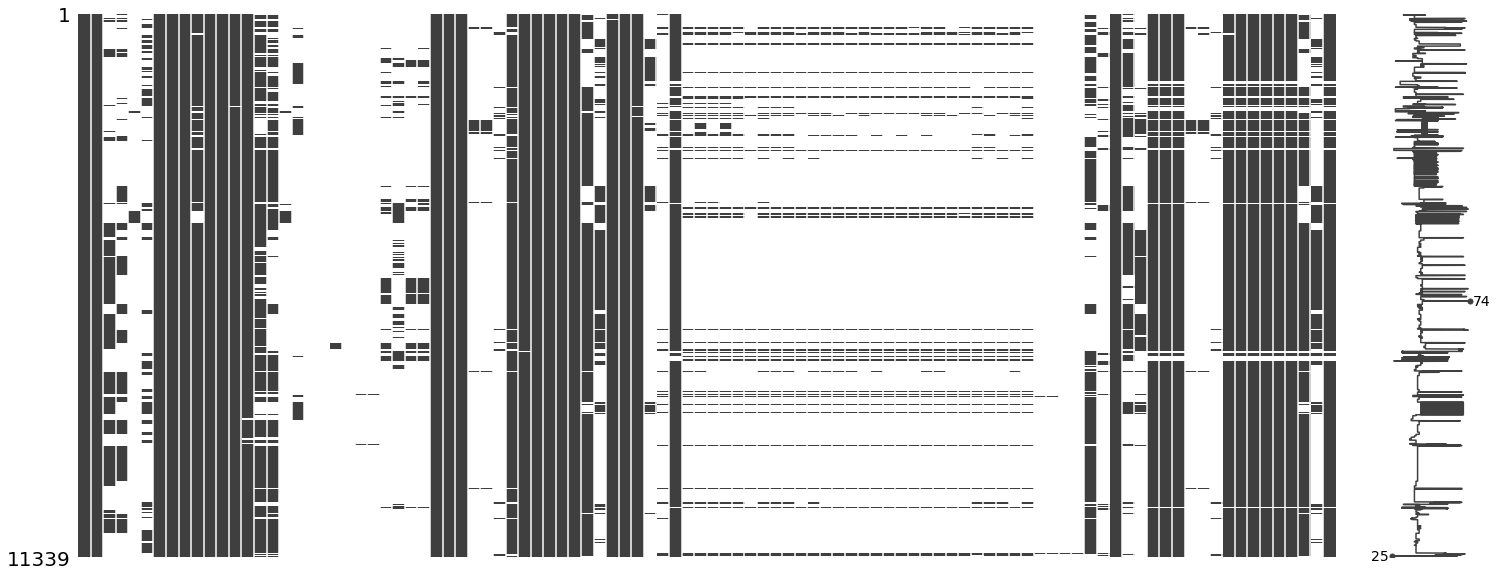

In [36]:
# Understanding data
# Print number of sample observations per class
unique, counts = np.unique(yv_major, return_counts=True)
for u, c in zip(unique, counts):
    print('id: {}, volcán: \033[1m{}\033[0m, count: {}'.format(u,df_volcanoes_major['Volcano'].cat.categories[u],c))

n_classes = len(unique)

# Visualizing missingness
msno.matrix(df_volcanoes_major)

#Visualizing data
df_volcanoes_viz = df_volcanoes_major.dropna(axis = 'rows',subset=(['SiO2']))[df_volcanoes_major['Volcano'].isin(
    ['Apagado','Cay','Corcovado','Cordón Cabrera','Huequi','Macá','Mentolat','Yanteles'])]
fig = px.scatter(df_volcanoes_major, 'SiO2_normalized', 'K2O_normalized' ,
                 color ='Volcano',# symbol = 'properties.SampleID',
                 color_discrete_map = colores(df_volcanoes['Volcano'],type="volcano"),
                 hover_data = ['SampleID','SampleObservationID',
                               'Volcano','Event','Authors',
                               'Flag'],width=800, height=500)
fig.show()

In [37]:
# Cross-validation without grid search 
# (i.e we take the default hyperparameters of the models)
# ------------------------------------------------------

start = time.time()
Balanced_Scores = []
scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Split test and train sets making sure that SamplePoints with the same SampleID are not separated
for train_index, test_index in GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_onlymajor_volcanoes, groups=SampleID_volcanoes_major):
#for train_index, test_index in skf.split(X, y):
    X_train_major_volcanoes, X_test_major_volcanoes = X_onlymajor_volcanoes.iloc[train_index], X_onlymajor_volcanoes.iloc[test_index]
    yv_train_major, yv_test_major = yv_major[train_index], yv_major[test_index]

    imp = IterativeImputer(random_state=0,min_value = 0,max_iter = 1500,
                       estimator=BayesianRidge(),initial_strategy = 'median')
    #imp = KNNImputer(n_neighbors=2)
    T_train_imp_major_volcanoes = imp.fit_transform(X_train_major_volcanoes)
    T_test_imp_major_volcanoes = imp.transform(X_test_major_volcanoes)

    sc = StandardScaler()
    T_train_esc_major_volcanoes = sc.fit_transform(T_train_imp_major_volcanoes)
    T_test_esc_major_volcanoes = sc.transform(T_test_imp_major_volcanoes)

    est.fit(T_train_esc_major_volcanoes, yv_train_major)
    ac = est.score(T_test_esc_major_volcanoes, yv_test_major)
    scores.append(ac)
    bc = balanced_accuracy_score(yv_test_major, est.predict(T_test_esc_major_volcanoes))
    Balanced_Scores.append(bc)
end = time.time()

print('Run time: {}'.format(end-start))
print('Mean test set accuracy: {}'.format(sum(scores)/len(scores)))
print('Mean test set Balanced accuracy: {}'.format(sum(Balanced_Scores)/len(Balanced_Scores)))

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



Run time: 1.591231346130371
Mean test set accuracy: 0.7986070722378517
Mean test set Balanced accuracy: 0.6215335466821589


In [38]:
# Cross-validation with grid search
# ---------------------------------
# Volcano is the target variable

n_samples = X_onlymajor_volcanoes.shape[0]
n_rep = 5

# Separate train and test sets taking into account SampleID
# (SamplePoints corresponding to a same SampleID are either in train or test sets)
train_inds, test_inds = next(GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_onlymajor_volcanoes, groups=SampleID_volcanoes_major))
X_train_out = X_onlymajor_volcanoes.iloc[train_inds]
y_train_out = yv_major[train_inds]
X_test_out = X_onlymajor_volcanoes.iloc[test_inds]
y_test_out = yv_major[test_inds]

clf = make_pipeline(IterativeImputer(random_state=0,min_value = 0,max_iter = 1500,
                       estimator=BayesianRidge(),initial_strategy = 'median'), StandardScaler(), est)

skf = StratifiedKFold(n_splits=3, shuffle=True)

gs = GridSearchCV(estimator=clf, param_grid=grid, cv=skf)
gs.fit(X_train_out, y_train_out)
res = pd.DataFrame(gs.cv_results_)
print(res)

# Compute accuracy
ac = gs.score(X_test_out, y_test_out)
print('Grid search CV accuracy: {}'.format(ac))
# Compute Balanced accuracy
bc = balanced_accuracy_score(y_test_out, gs.predict(X_test_out))
print('Grid search CV balanced accuracy: {}'.format(bc))
best_est = gs.best_estimator_

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.057961      0.008389         0.071544        0.009077   
1       0.060301      0.004130         0.024618        0.006321   
2       0.064113      0.001079         0.076798        0.005996   
3       0.058893      0.008383         0.039078        0.005840   
4       0.058181      0.006843         0.083571        0.000859   
5       0.062472      0.007802         0.043274        0.006941   

  param_kneighborsclassifier__n_neighbors param_kneighborsclassifier__weights  \
0                                       2                             uniform   
1                                       2                            distance   
2                                       5                             uniform   
3                                       5                            distance   
4                                      10                             uniform   
5                                      10   

In [39]:
print(best_est.steps[2][1])
my_est_volcanoes_major = best_est.steps[2][1]

KNeighborsClassifier(n_neighbors=2, weights='distance')


In [40]:
yv_pred_major = my_est_volcanoes_major.predict(T_test_esc_major_volcanoes)

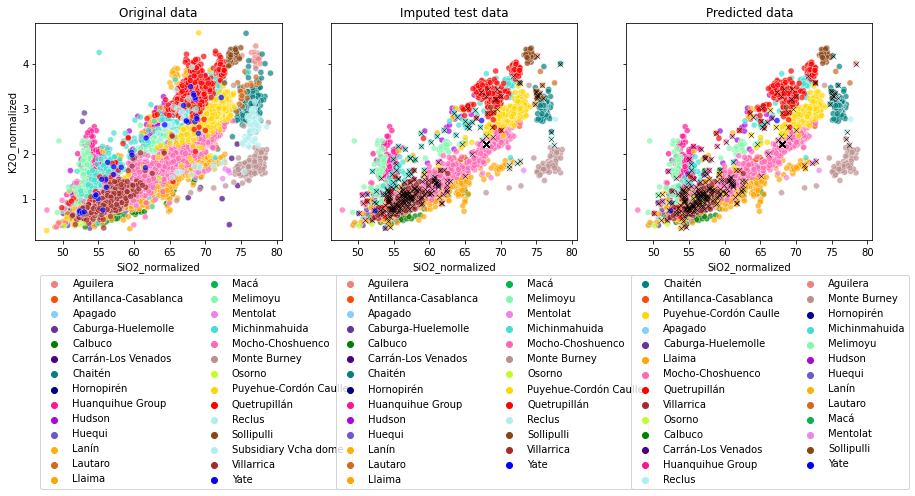

In [49]:
yv_test_major_name = BOOM_geodf['Volcano'].cat.categories[yv_test_major]
yv_pred_major_name = BOOM_geodf['Volcano'].cat.categories[yv_pred_major]
ind_wrong = np.where(yv_pred_major != yv_test_major)[0]
X_test_imp_volcanoes_major = pd.DataFrame(T_test_imp_major_volcanoes, columns = X_onlymajor_volcanoes.columns)

fig, axes = plt.subplots(1, 3, figsize=(15,4),sharex=True,sharey=True)
A = 'SiO2_normalized'
B = 'K2O_normalized'  
sns.scatterplot(x=X_onlymajor_volcanoes.loc[:, A], y=X_onlymajor_volcanoes.loc[:,B],
                hue=BOOM_geodf['Volcano'].cat.categories[yv_major], alpha=0.7,
                palette=colores(BOOM_geodf['Volcano'].cat.categories[yv_major],'volcano'), ax=axes[0])
axes[0].set_title("Original data")
axes[0].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)
   
sns.scatterplot(x=X_test_imp_volcanoes_major.loc[:, A], y=X_test_imp_volcanoes_major.loc[:, B],
                hue=yv_test_major_name, alpha=0.7, palette=colores(BOOM_geodf['Volcano'].cat.categories[yv_test_major],'volcano'), ax=axes[1])
sns.scatterplot(x=X_test_imp_volcanoes_major[A].iloc[ind_wrong],
                y=X_test_imp_volcanoes_major[B].iloc[ind_wrong],
                alpha=1,  ax=axes[1], marker='x', color='k',s=30)
axes[1].set_title("Imputed test data")
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)
    
sns.scatterplot(x=X_test_imp_volcanoes_major.loc[:, A],
                    y=X_test_imp_volcanoes_major.loc[:, B],
                hue=yv_pred_major_name, alpha=0.7, palette=colores(BOOM_geodf['Volcano'].cat.categories[yv_pred_major],'volcano'), ax=axes[2])
sns.scatterplot(x=X_test_imp_volcanoes_major[A].iloc[ind_wrong],
                y=X_test_imp_volcanoes_major[B].iloc[ind_wrong],
                alpha=1,  ax=axes[2], marker='x', color='k',s=30)
axes[2].set_title("Predicted data")
axes[2].legend(loc='center left', bbox_to_anchor=(0, -0.65), ncol=2)

C:\Users\consue\AppData\Local\Temp\ipykernel_9764\1705821760.py:3: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\consue\AppData\Local\Temp\ipykernel_9764\1705821760.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



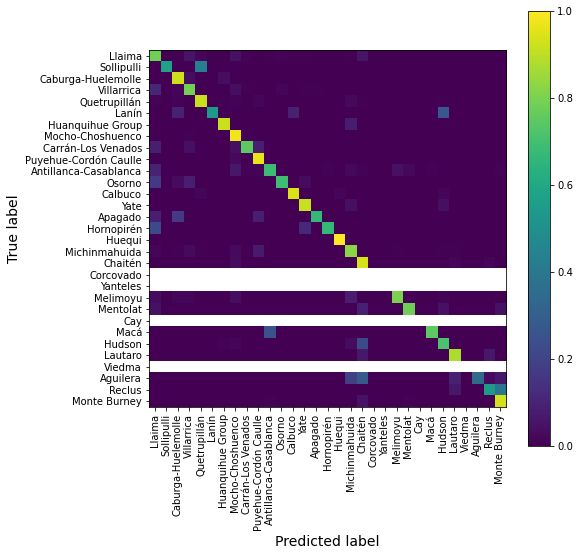

In [50]:
fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(111)
cm = confusion_matrix(yv_test_name, yv_pred_name,labels=np.asarray(volcanoes_by_latitude),normalize='true')
cm = (cm.T/cm.sum(axis=1)).T
plt.imshow(cm, cmap = 'viridis')
plt.colorbar()
ax.set_xticks(np.arange(len(volcanoes_by_latitude)));ax.set_xticklabels(volcanoes_by_latitude)
ax.set_yticks(np.arange(len(volcanoes_by_latitude)));ax.set_yticklabels( volcanoes_by_latitude)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14); plt.xticks(rotation=90)
fig.show()

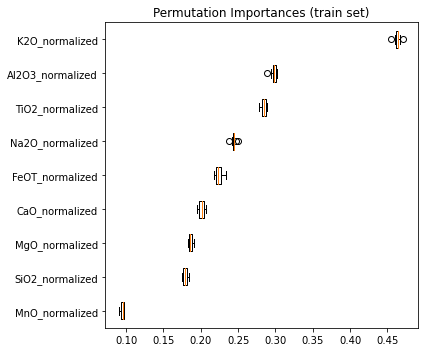

In [51]:
result = permutation_importance(
    best_est, X_train_major_volcanoes, yv_train_major, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(6,5))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train_major_volcanoes.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

### 3.4 Event as target variable, all chemical elements as features

id: 0, volcán: 1640 Llaima, count: 7
id: 1, volcán: 1751 Llaima, count: 10
id: 2, volcán: 1780 Llaima, count: 8
id: 3, volcán: 1852 Llaima, count: 186
id: 4, volcán: 1903 Llaima, count: 2
id: 5, volcán: 1945 Llaima, count: 2
id: 6, volcán: 1957 Llaima, count: 41
id: 7, volcán: 1994 Llaima, count: 5
id: 8, volcán: 2008 Llaima, count: 63
id: 9, volcán: ?11.7 ka MEN, count: 38
id: 10, volcán: A1, count: 42
id: 11, volcán: Achen, count: 128
id: 12, volcán: Alerce Ignimbrite, count: 6
id: 13, volcán: Alpehué, count: 69
id: 14, volcán: Ap1, count: 42
id: 15, volcán: Arauco, count: 287
id: 16, volcán: Ca1, count: 1
id: 17, volcán: Ca10, count: 1
id: 18, volcán: Ca12, count: 2
id: 19, volcán: Ca13, count: 2
id: 20, volcán: Ca3, count: 1
id: 21, volcán: Ca4, count: 1
id: 22, volcán: Ca5, count: 1
id: 23, volcán: Ca7, count: 1
id: 24, volcán: Ca8, count: 1
id: 25, volcán: Calbuco 1893, count: 1
id: 26, volcán: Calbuco 1929, count: 1
id: 27, volcán: Calbuco 1961, count: 1
id: 28, volcán: Calbuco 

C:\Users\consue\AppData\Local\Temp\ipykernel_16568\1724230239.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



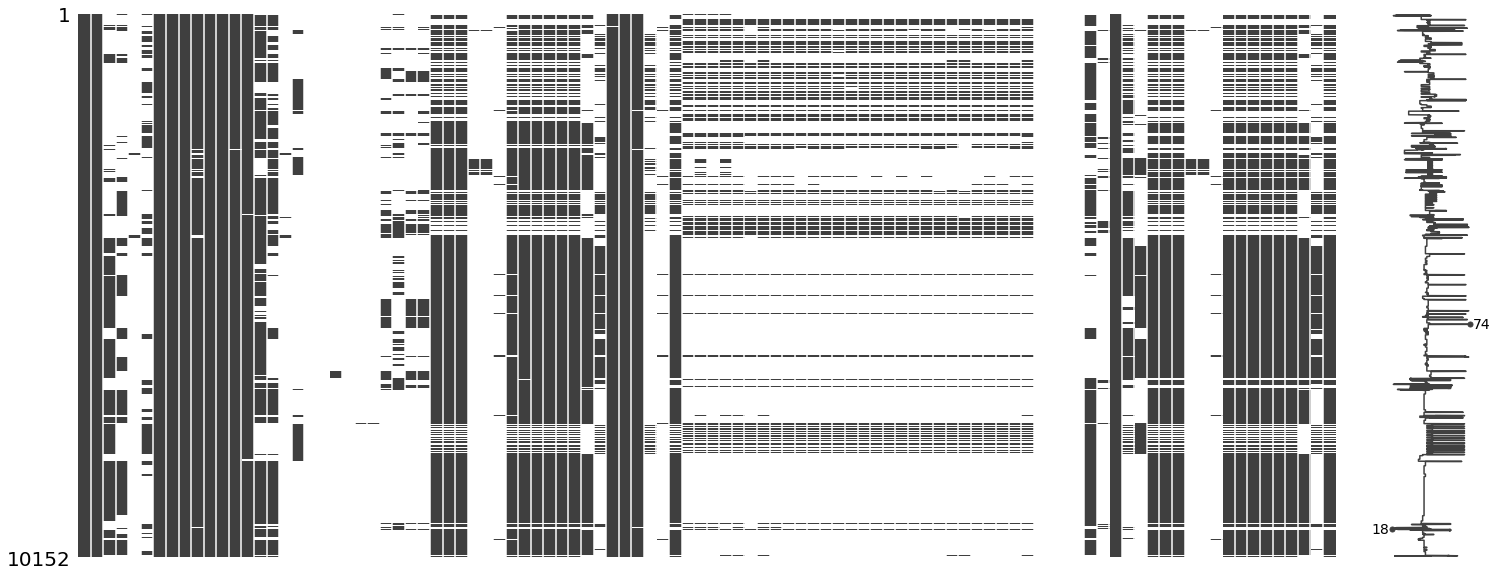

In [14]:
# Understanding data
# Print number of sample observations per class
unique, counts = np.unique(ye, return_counts=True)
for u, c in zip(unique, counts):
    print('id: {}, volcán: \033[1m{}\033[0m, count: {}'.format(u,df_events['Event'].cat.categories[u],c))

n_classes = len(unique)

# Visualizing missingness
msno.matrix(df_events)

#Visualizing data
df_events_viz = df_events.dropna(axis = 'rows',subset=(['SiO2']))[df_events['Volcano'].isin(
    ['Apagado','Cay','Corcovado','Cordón Cabrera','Huequi','Macá','Mentolat','Yanteles'])]
fig = px.scatter(df_events, 'SiO2_normalized', 'K2O_normalized' ,
                 color ='Volcano',# symbol = 'properties.SampleID',
                 color_discrete_map = colores(df_volcanoes['Volcano'],type="volcano"),
                 hover_data = ['SampleID','SampleObservationID',
                               'Volcano','Event','Authors',
                               'Flag'],width=800, height=500)
fig.show()

In [ ]:
#events with less than 5 samples
'1903 Llaima','1945 Llaima'
'Ca1','Ca10','Ca12','Ca13','Ca3','Ca4','Ca5','Ca7','Ca8','Calbuco 1893','Calbuco 1929','Calbuco 1961','Calbuco 1971?'
'Chufquén'
'HW6','Hudson1971',
'Lautaro1933'
'MC26','MC27','MIC1'
'Pilmaiquén'
'T1','T2'
'Villarrica 1971', 'Villarrica 1984'
'Ya1', 'Ya2','YaSc'

In [15]:
# Cross-validation without grid search
# (i.e we take the default hyperparameters of the models)
# ------------------------------------------------------

start = time.time()
Balanced_Scores = []
scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Split test and train sets making sure that SamplePoints with the same SampleID are not separated
for train_index, test_index in GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_events, groups=SampleID_events):
#for train_index, test_index in skf.split(X, y):
    X_train_events, X_test_events = X_events.iloc[train_index], X_events.iloc[test_index]
    ye_train, ye_test = ye[train_index], ye[test_index]

    imp = IterativeImputer(random_state=0,min_value = 0,max_iter = 1500,
                       estimator=BayesianRidge(),initial_strategy = 'median')
    #imp = KNNImputer(n_neighbors=2)
    T_train_imp_events = imp.fit_transform(X_train_events)
    T_test_imp_events = imp.transform(X_test_events)

    sc = StandardScaler()
    T_train_esc_events = sc.fit_transform(T_train_imp_events)
    T_test_esc_events = sc.transform(T_test_imp_events)

    est.fit(T_train_esc_events, ye_train)
    ac = est.score(T_test_esc_events, ye_test)
    scores.append(ac)
    bc = balanced_accuracy_score(ye_test, est.predict(T_test_esc_events))
    Balanced_Scores.append(bc)
end = time.time()

print('Run time: {}'.format((end-start)/60))
print('Mean test set accuracy: {}'.format(sum(scores)/len(scores)))
print('Mean test set Balanced accuracy: {}'.format(sum(Balanced_Scores)/len(Balanced_Scores)))

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



Run time: 1232.608276128769
Mean test set accuracy: 0.664791314257544
Mean test set Balanced accuracy: 0.4855554964607112


C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



In [17]:
# Cross-validation with grid search
# ---------------------------------
# Event is the target variable

n_samples = X_events.shape[0]
n_rep = 5

# Separate train and test sets taking into account SampleID
# (SamplePoints corresponding to a same SampleID are either in train or test sets)
train_inds, test_inds = next(GroupShuffleSplit(
    test_size=.30, n_splits=5, random_state = 0).split(X_events, groups=SampleID_events))
X_train_out = X_events.iloc[train_inds]
y_train_out = ye[train_inds]
X_test_out = X_events.iloc[test_inds]
y_test_out = ye[test_inds]

clf = make_pipeline(IterativeImputer(random_state=0,min_value = 0,max_iter = 2000,
                       estimator=BayesianRidge(),initial_strategy = 'median'), StandardScaler(), est)

skf = StratifiedKFold(n_splits=3, shuffle=True)

gs = GridSearchCV(estimator=clf, param_grid=grid, cv=skf)
gs.fit(X_train_out, y_train_out)
res = pd.DataFrame(gs.cv_results_)
print(res)

# Compute accuracy
ac = gs.score(X_test_out, y_test_out)
print('Grid search CV accuracy: {}'.format(ac))
# Compute Balanced accuracy
bc = balanced_accuracy_score(y_test_out, gs.predict(X_test_out))
print('Grid search CV balanced accuracy: {}'.format(bc))
best_est_events = gs.best_estimator_

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     218.913011     50.056813        24.804667        7.593076   
1     209.393523     59.958734        16.828077        5.728519   
2      86.608712     16.417378         8.519693        1.693088   
3      89.051138     18.534189         6.971435        1.394808   
4      88.718574     19.513169        10.659657        1.382794   
5      89.396998     18.965704         6.929505        1.385588   

  param_kneighborsclassifier__n_neighbors param_kneighborsclassifier__weights  \
0                                       2                             uniform   
1                                       2                            distance   
2                                       5                             uniform   
3                                       5                            distance   
4                                      10                             uniform   
5                                      10   

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning:

y_pred contains classes not in y_true



In [18]:
print(best_est_events.steps[2][1])
my_est_events = best_est_events.steps[2][1]

KNeighborsClassifier(weights='distance')


In [19]:
ye_pred = my_est_events.predict(T_test_esc_events)

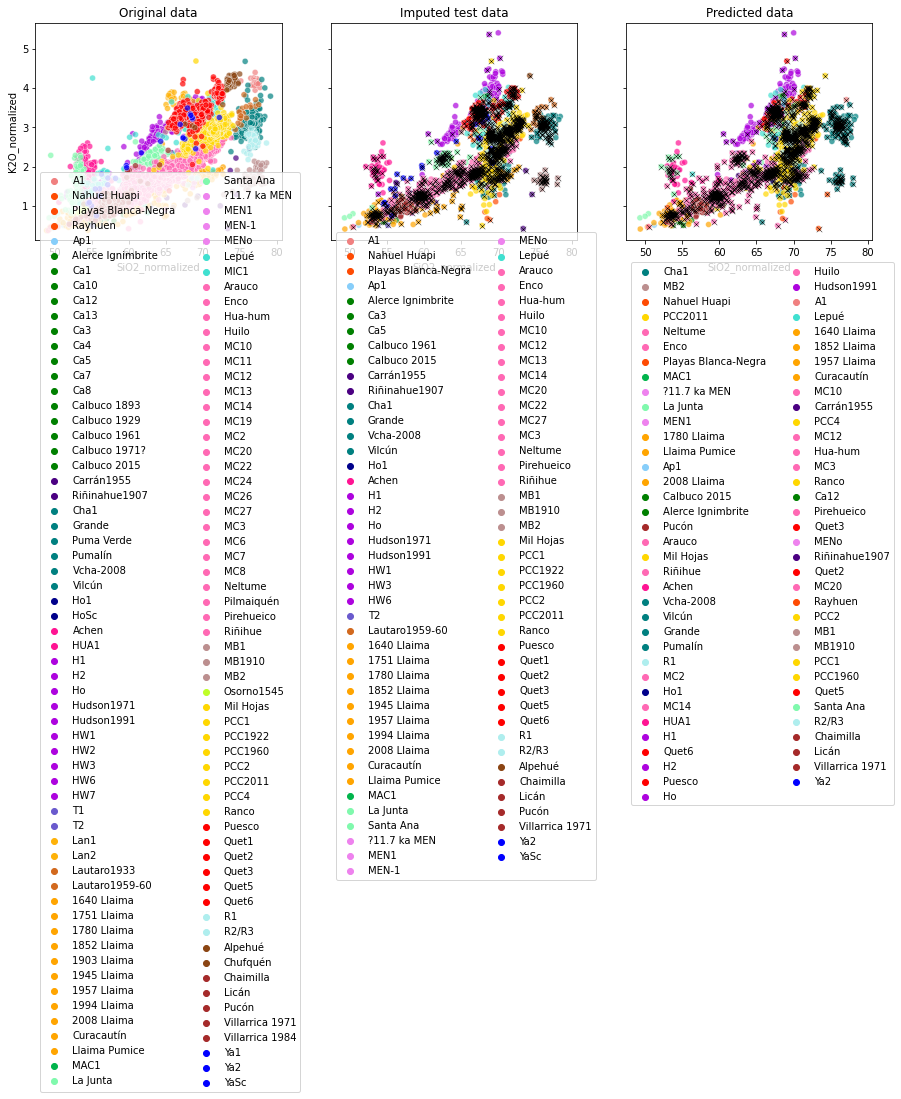

In [28]:
ye_test_name = BOOM_geodf['Event'].cat.categories[ye_test]
ye_pred_name = BOOM_geodf['Event'].cat.categories[ye_pred]
ind_wrong = np.where(ye_pred != ye_test)[0]
X_test_imp_events = pd.DataFrame(T_test_imp_events, columns = X_events.columns)

fig, axes = plt.subplots(1, 3, figsize=(15,4),sharex=True,sharey=True)
A = 'SiO2_normalized'
B = 'K2O_normalized'  

print()
sns.scatterplot(x=X_events.loc[:, A], y=X_events.loc[:,B],
                hue=BOOM_geodf['Event'].cat.categories[ye],  alpha=0.7,
                palette=colores(BOOM_geodf['Event'].cat.categories[ye],'event') , ax=axes[0])
axes[0].set_title("Original data")
axes[0].legend(loc='center left', bbox_to_anchor=(0, -1.8), ncol=2)
   
sns.scatterplot(x=X_test_imp_events.loc[:, A], y=X_test_imp_events.loc[:, B],
                hue=ye_test_name, alpha=0.7, palette=colores(BOOM_geodf['Event'].cat.categories[ye_test],'event') , ax=axes[1])
sns.scatterplot(x=X_test_imp_events[A].iloc[ind_wrong],
                y=X_test_imp_events[B].iloc[ind_wrong],
                alpha=1,  ax=axes[1], marker='x', color='k',s=30)
axes[1].set_title("Imputed test data")
axes[1].legend(loc='center left', bbox_to_anchor=(0, -1.45), ncol=2)
    
sns.scatterplot(x=X_test_imp_events.loc[:, A],
                    y=X_test_imp_events.loc[:, B],
                hue=ye_pred_name, alpha=0.7, palette=colores(BOOM_geodf['Event'].cat.categories[ye_pred],'event') , ax=axes[2])
sns.scatterplot(x=X_test_imp_events[A].iloc[ind_wrong],
                y=X_test_imp_events[B].iloc[ind_wrong],
                alpha=1,  ax=axes[2], marker='x', color='k',s=30)
axes[2].set_title("Predicted data")
axes[2].legend(loc='center left', bbox_to_anchor=(0, -1.35), ncol=2)

87


C:\Users\consue\AppData\Local\Temp\ipykernel_16568\3469488692.py:42: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\consue\AppData\Local\Temp\ipykernel_16568\3469488692.py:49: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



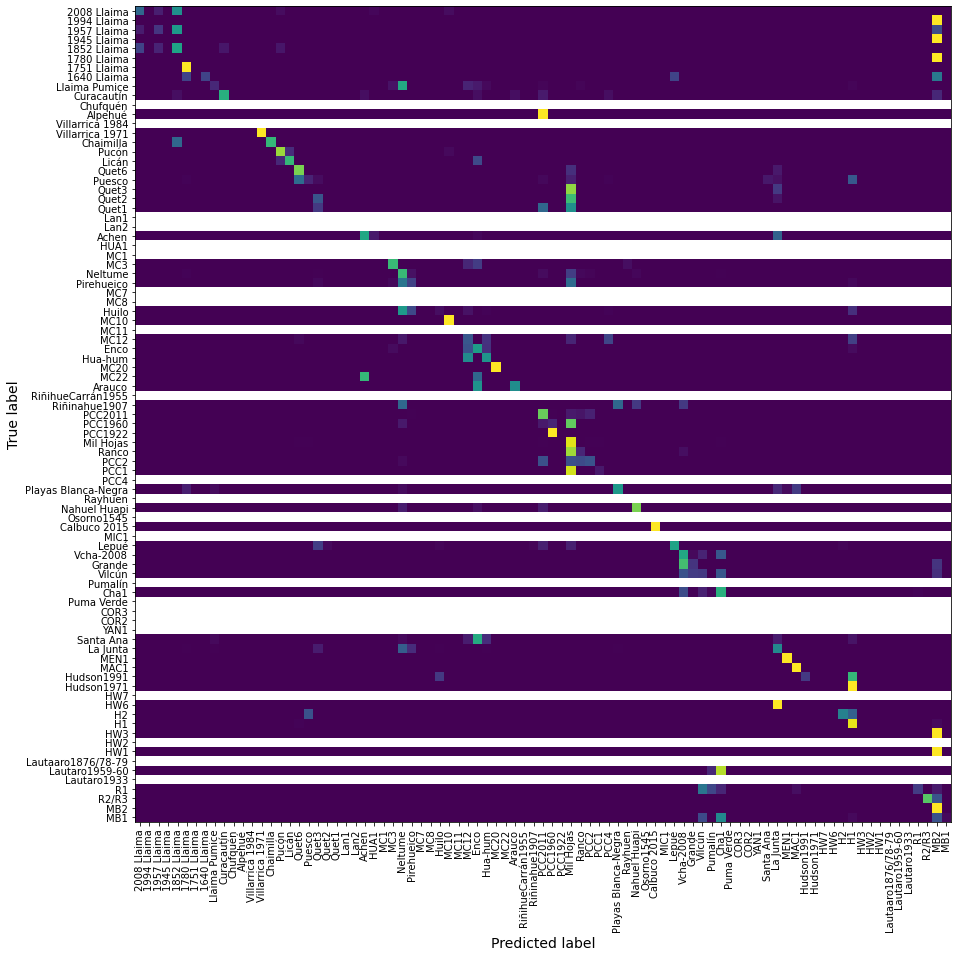

In [31]:
# Plot confusion matrix

events_by_volcano = [
    '2008 Llaima','1994 Llaima','1957 Llaima','1945 Llaima','1852 Llaima',   #Llaima
    '1780 Llaima','1751 Llaima','1640 Llaima','Llaima Pumice', 
    'Curacautín',                
    'Chufquén','Alpehué',                                                    #Sollipulli
                                                                             #Caburga-Huelemolle
    'Villarrica 1984','Villarrica 1971','Chaimilla','Pucón','Licán',         #Villarica
    'Quet6','Puesco','Quet3','Quet2','Quet1',                                #Quetrupillán
            'Lan1', 'Lan2',                                                  #Lanín
    'Achen','HUA1',                                                          #Huanquihue Group
    'MC1','MC3','Neltume','Pirehueico','MC7', 'MC8', 'Huilo','MC10','MC11',  #Mocho-Choshuenco
    'MC12','Enco','Hua-hum', 'MC20','MC22','Arauco', 'Riñihue'               
    'Carrán1955', 'Riñinahue1907',                                           #Carrán-Los Venados
    'PCC2011','PCC1960','PCC1922','Mil Hojas','Ranco','PCC2','PCC1','PCC4',  #PCC
    'Playas Blanca-Negra','Rayhuen','Nahuel Huapi',                          #Antillanca-Casablanca
    'Osorno1545',                                                            #Osorno
    'Calbuco 2015',                                                          #Calbuco
                                                                             #Yate
                                                                             #Apagado
                                                                             #Hornopirén
                                                                             #Huequi
    'MIC1','Lepué',                                                          #Michinmahuida                                                  
    'Vcha-2008','Grande','Vilcún','Pumalín','Cha1','Puma Verde',             #Chaitén
    'COR3','COR2',                                                           #Corcovado
    'YAN1',                                                                  #Yanteles
    'Santa Ana', 'La Junta',                                                 #Melimoyu
    'MEN1',                                                                  #Mentolat
                                                                             #Cay
    'MAC1',                                                                  #Macá
    'Hudson1991','Hudson1971','HW7','HW6','H2','H1','HW3','HW2','HW1',       #Hudson
    'Lautaaro1876/78-79','Lautaro1959-60','Lautaro1933',                     #Lautaron
                                                                             #Viedma
                                                                             #Aguilera
    'R1', 'R2/R3',                                                           #Reclus
    'MB2','MB1']                                                             #Burney
        
print(len(events_by_volcano))
fig = plt.figure(figsize=(15,15)); ax = fig.add_subplot(111)
cm = confusion_matrix(ye_test_name, ye_pred_name,labels=np.asarray(events_by_volcano))
cm = (cm.T/cm.sum(axis=1)).T
plt.imshow(cm, cmap = 'viridis')
#plt.colorbar()
ax.set_xticks(np.arange(len(events_by_volcano)));ax.set_xticklabels(events_by_volcano)
ax.set_yticks(np.arange(len(events_by_volcano)));ax.set_yticklabels(events_by_volcano)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14); plt.xticks(rotation=90)
fig.show()

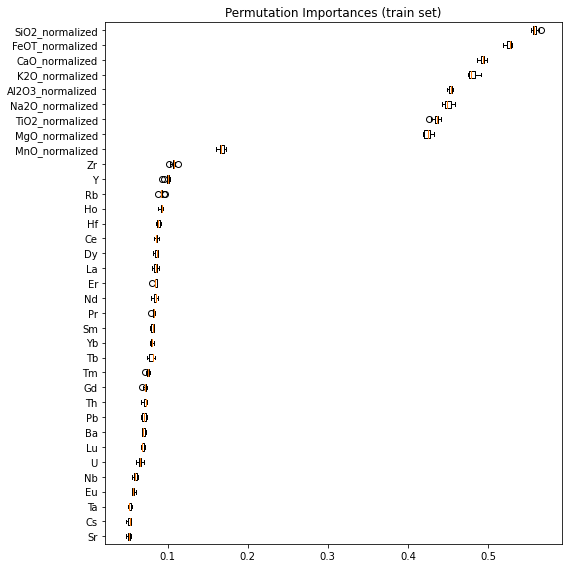

In [34]:
result = permutation_importance(
    best_est_events, X_train_events, ye_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train_events.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()